# **Data Science and Artificial Intelligence mini project**

We as university students are constantly bombarded with assignments and never ending work. With such a fast paced work environment, we often neglect our own mental and physical health by comprimising on sleep. However, at times it is impractical and near impossible to not lose a little bit of sleep in order to meet deadlines. Therefore, our group would like to dive deeper into the factors that affect our quality of sleep and how to get the most out of our sleep. 
<br> <br> 
REM sleep is the most important phase of the sleep cycle because it plays an important role in dreaming, memory, emotional processing, and healthy brain development. Therefore, REM sleep can be a primary indicator of whether an indivdual is properly rested when he is asleep.
<br> <br>
### Problem Statement: How can we maximise our REM sleep? 

# Imported Files, Libraries

In [ ]:
!pip install -U -q PyDrive
!pip install scikit-learn
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
from numpy import nan
import numpy as np
import datetime
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay



# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Initializing downloaded to a file stored on Google Drive (Kaggel Sleep Efficiency Dataset)
downloaded = drive.CreateFile({'id':"1_47ELyzyV4s52GJTp54FmqfzixvflyKn"}) 

# Downloads file content and saves it as a local file named "Sleepefficiencydata.csv"
downloaded.GetContentFile('Sleepefficiencydata.csv')  


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Reading sleep data from kaggle. 
Initializing our sleep data as "rawdata" for data manipulation.

In [ ]:
# Showing our rawd data
rawdata = pd.read_csv('Sleepefficiencydata.csv')
rawdata

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,6/3/2021 1:00,6/3/2021 7:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,5/12/2021 2:00,5/12/2021 9:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,25/5/2021 21:30,25/5/2021 5:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,3/11/2021 2:30,3/11/2021 8:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,13/3/2021 1:00,13/3/2021 9:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,13/11/2021 22:00,13/11/2021 5:30,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,31/3/2021 21:00,31/3/2021 3:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,7/9/2021 23:00,7/9/2021 7:30,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,29/7/2021 21:00,29/7/2021 4:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


Upon closer inspection of our data, we realised that there were NaN values in some of the rows. One example is row 449 for the column of "Caffeine Consumption".
<br> <br>
We decided to fill in the NaN values with the mode of each of the columns. Our reason for doing so will be explained further below. 
<br> <br>
We also decided to change the display of the column "Bedtime" to only display the sleep time in 24hour clock with integer values so that it would be easier to manipulate. As a result, we no longer required the "Bedtime" column from the original kaggle dataset.
<br> <br>
We also decided to rearrange the columns.

In [ ]:
# dropping of columns which we did not require in our analysis 
df = rawdata.drop([ 'Wakeup time', 'Gender', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Smoking status'], axis=1)

# Replacing the NaN values with the mode of each of the respective columns
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].mode()[0])
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].mode()[0])
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].mode()[0])

# Adding a new column "Actual Sleep Duration" that is a product of "Sleep duration" and "sleep efficiency" to 
# find the actual number of hours that an individual is actually asleep (and not only merely lying in bed)
df['Actual Sleep Duration'] = df['Sleep duration'] * df['Sleep efficiency']

# Converting the original "Bedtime" column into a 24hour clock with integer values for easier manipulation in the future. 
df = df.assign(Btime=df['Bedtime'].str.split( ).str.get(1))
df['Btime'] = df['Btime'].str.replace(':','')
df['Btime'] = df['Btime'].astype(int)

# As a result, we no longer needed the original "Bedtime" column and could drop it as well.
df = df.drop(['Bedtime'],axis=1)

# Rearrangement of the cleaned data
df = df.iloc[:,[0,1,2,3,5,6,7,4,8,9]]

# Showing the cleaned data
df

,ID,Age,Sleep duration,Sleep efficiency,Caffeine consumption,Alcohol consumption,Exercise frequency,REM sleep percentage,Actual Sleep Duration,Btime
0,1,65,6.0,0.88,0.0,0.0,3.0,18,5.280,100
1,2,69,7.0,0.66,0.0,3.0,3.0,19,4.620,200
2,3,40,8.0,0.89,0.0,0.0,3.0,20,7.120,2130
3,4,40,6.0,0.51,50.0,5.0,1.0,23,3.060,230
4,5,57,8.0,0.76,0.0,3.0,3.0,27,6.080,100
...,...,...,...,...,...,...,...,...,...,...
447,448,27,7.5,0.91,0.0,0.0,5.0,22,6.825,2200
448,449,52,6.0,0.74,25.0,0.0,3.0,28,4.440,2100
449,450,40,8.5,0.55,0.0,3.0,0.0,20,4.675,2300
450,451,45,7.0,0.76,0.0,0.0,3.0,18,5.320,2100


# EDA on sleep duration, Bedtime, Caffine consumption, Alchohol consumption, Excercise frequency vs REM sleep percentage

We predicted that the other 5 variables would have the greatest impact on an individual's quality of sleep and are also the easiest variables to manipulate


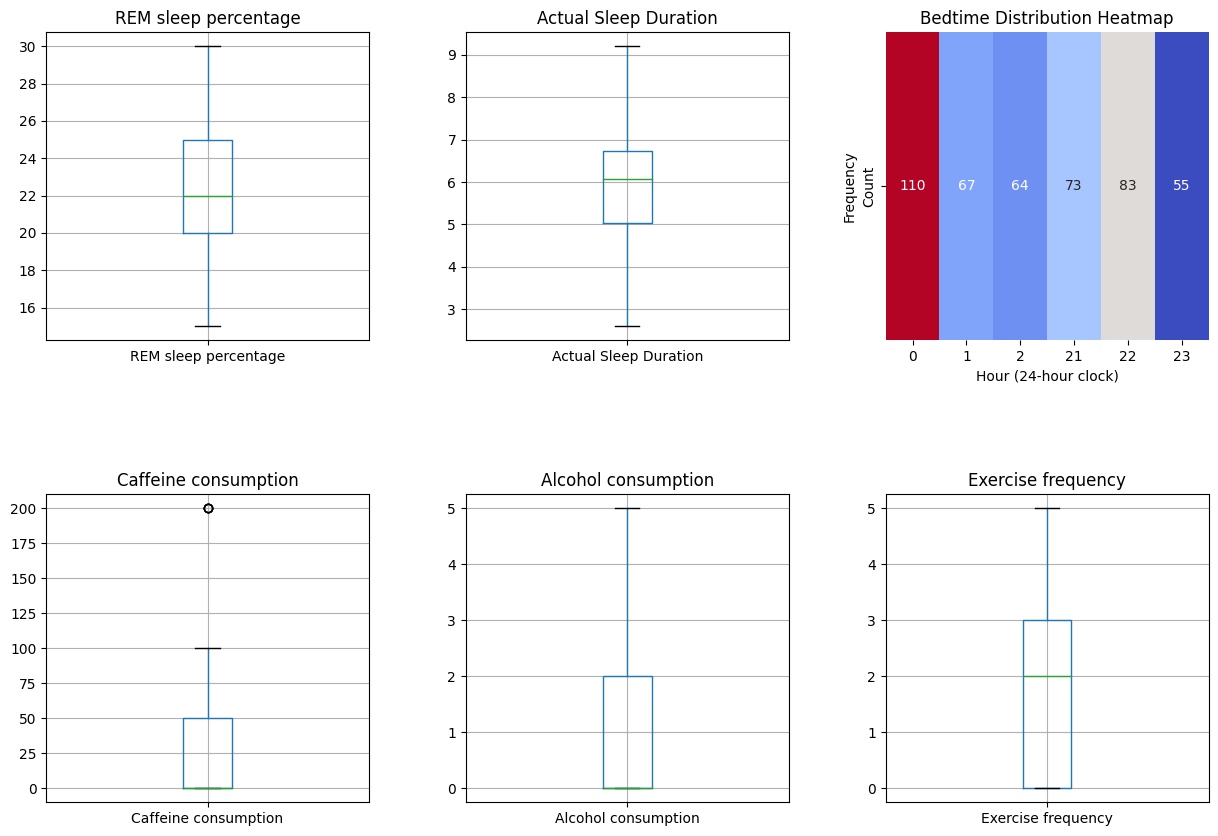

In [ ]:
import seaborn as sns
import math

# Create hour bins for Btime
df['Hour_bin'] = df['Btime'].apply(lambda x: math.floor(x / 100))

# Calculate the frequency count for each hour bin
hour_bin_counts = df['Hour_bin'].value_counts().sort_index()

# Convert the frequency counts to a DataFrame
hour_bin_counts_df = pd.DataFrame(hour_bin_counts).reset_index()
hour_bin_counts_df.columns = ['Hour', 'Count']

# Convert the DataFrame to a matrix format suitable for heatmap
hour_bin_counts_matrix = hour_bin_counts_df.pivot_table(values='Count', index=None, columns='Hour')

# Create a figure with two rows of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot the first boxplot on the first subplot
REM_Sleep_boxplot = df.boxplot(column='REM sleep percentage', ax=ax1)
ax1.set_title('REM sleep percentage')

# Plot the second boxplot on the second subplot
Sleep_Efficiency_boxplot = df.boxplot(column='Actual Sleep Duration', ax=ax2)
ax2.set_title('Actual Sleep Duration')

# Plot the heatmap on the third subplot
sns.heatmap(hour_bin_counts_matrix, annot=True, cmap='coolwarm', fmt='g', cbar=False, ax=ax3)
ax3.set_title('Bedtime Distribution Heatmap')
ax3.set_xlabel('Hour (24-hour clock)')
ax3.set_ylabel('Frequency')

# Plot the fourth boxplot on the fourth subplot
Caffeine_Consumption_boxplot = df.boxplot(column='Caffeine consumption', ax=ax4)
ax4.set_title('Caffeine consumption')

# Plot the fifth boxplot on the fifth subplot
Alcohol_Consumption_boxplot = df.boxplot(column='Alcohol consumption', ax=ax5)
ax5.set_title('Alcohol consumption')

# Plot the sixth boxplot on the sixth subplot
Exercise_Frequency_boxplot = df.boxplot(column='Exercise frequency', ax=ax6)
ax6.set_title('Exercise frequency')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Show the figure
plt.show()


Upon primitive exploratory data analysis, we found the median values of the 6 relevant values we wanted to use for our project. 
<br> <br>
On closer inspection of the boxplot for caffeine consumption, alcohol consumption and exercise frequency, we learnt that the median values for each of these variables was 0.0. Hence, we chose not to use the median or mean values to fill in the NaN values and decided to use mode instead.

However, we also wanted to know which of the 5 factors - age, caffeine consumption, alcohol consumption, exercise frequency, actual sleep duration and bed time - had the greatest correlation to REM sleep percentage. 
<br> <br>
Thus, we created a temporary dataframe (for better visualisation) to plot the corresponding heatmap.  

<Axes: >

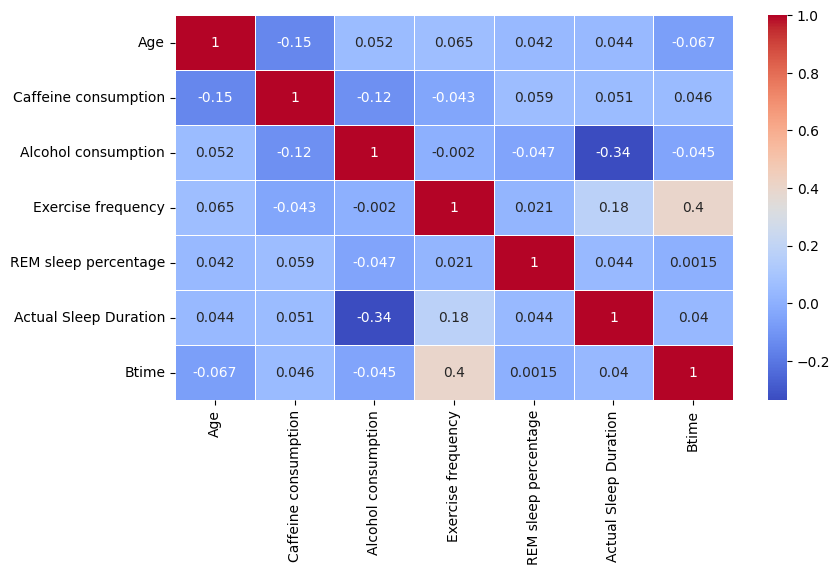

In [ ]:
# Dropping of other variables
temp_df = df.drop([ 'ID', 'Sleep duration', 'Sleep efficiency'], axis=1)

# Plotting the heatmap
plt.figure(figsize=(9,5))
sb.heatmap(temp_df.corr(), annot = True, cmap='coolwarm',linewidth=0.5)

As expected, the actual sleep duration is closely correlated to the REM sleep percentage. However, what was unexpected was the relatively high correlation between caffeine consumption and REM sleep percentage, even higher than that between actual sleep duration and REM sleep percentage.

# Ridge Regression

In this section, we have decided to use a ridge regression model to visualise the linearity of the correlations between the 5 variables and REM sleep percentage. The reason why we decided to use ridge regression instead of linear regression, is because we felt that the added advantage of ridge regression being able to penalize large coeffecients would be useful in our data analysis

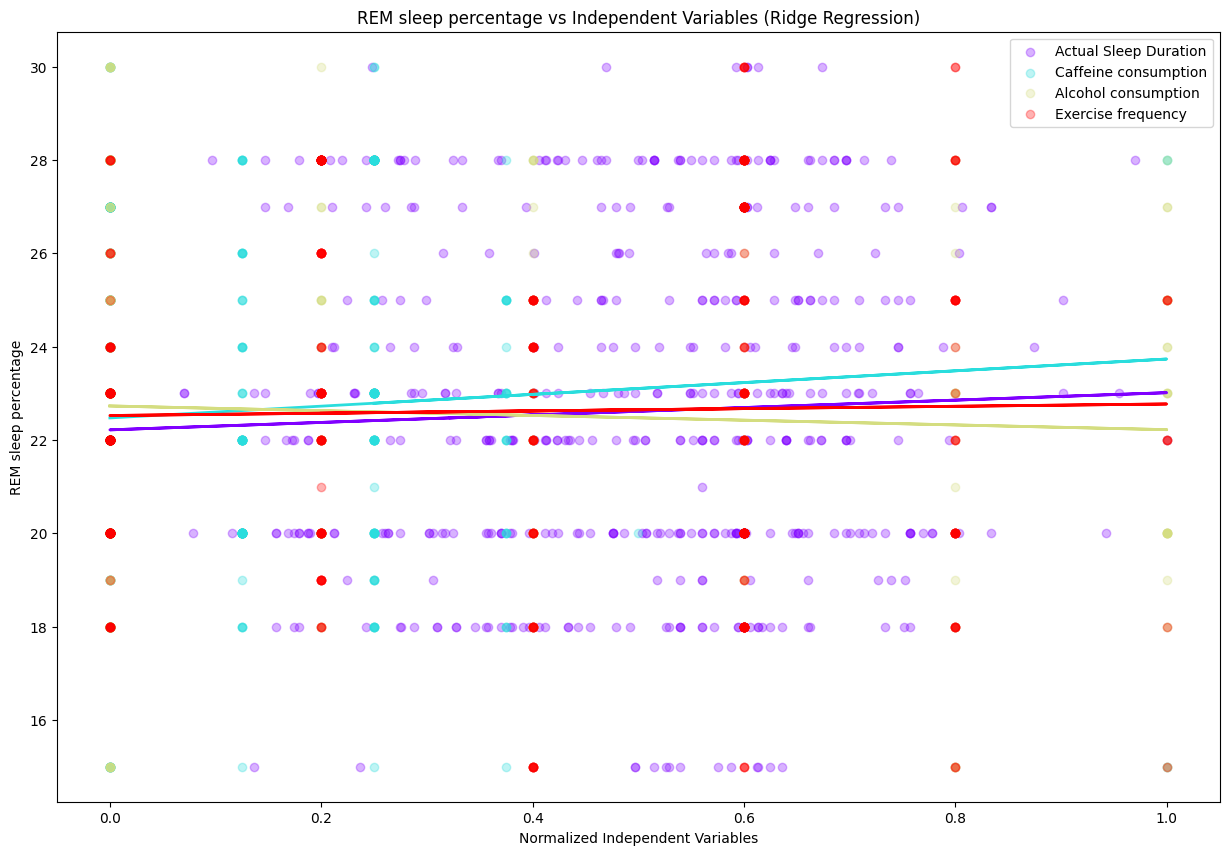

Mean Squared Error (Ridge Regression): 14.314556306389871


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm

# Independent variables
independent_variables = ["Actual Sleep Duration", "Caffeine consumption", "Alcohol consumption", "Exercise frequency"]

# Normalize the independent variables
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[independent_variables])
scaled_df = pd.DataFrame(scaled_df, columns=independent_variables)

# Colors for each variable
colors = cm.rainbow(np.linspace(0, 1, len(independent_variables)))

# Create a figure
fig, ax = plt.subplots(figsize=(15, 10))

# Set the regularization parameter alpha for Ridge regression
alpha = 1.0

# Iterate through independent variables and create a scatterplot with the fitted line for each
for index, variable in enumerate(independent_variables):
    x = scaled_df[[variable]].values
    y = df["REM sleep percentage"].values
    
    # Create and fit the ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(x, y)
    
    # Calculate the predicted values
    y_pred = model.predict(x)

    # Plot the scatterplot
    ax.scatter(x, y, color=colors[index], alpha=0.3, label=variable)

    # Plot the fitted line
    ax.plot(x, y_pred, color=colors[index], linewidth=2)

# Set labels and title
ax.set_xlabel("Normalized Independent Variables")
ax.set_ylabel("REM sleep percentage")
ax.set_title("REM sleep percentage vs Independent Variables (Ridge Regression)")

# Add a legend
ax.legend()

# Show the figure
plt.show()

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Independent variables
independent_variables = ["Actual Sleep Duration", "Caffeine consumption", "Alcohol consumption", "Exercise frequency"]

# Prepare the data
X = df[independent_variables]
y = df["REM sleep percentage"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Errors

ridge_mse = mean_squared_error(y_test, ridge_y_pred)


print("Mean Squared Error (Ridge Regression):", ridge_mse)


From our scatterplot, we can now even more clearly see that caffeine consumption has the higest correlation to sleep percentage.

# Random Forest

In this section we have chosen to use random forest regression. We chose it as it can handle high dimensional data. Sleep efficiency data set has many variables. Thus random forest regression can choose the most important features and make a decision based on it. Additionally, Random forest can also handle imbalanced data such as people sleeping in the day vs those sleeping at night by using techniques such as over sampling or under sampling, which increases the accuracy of the data.


Cleaned data for Random Forest

In [ ]:
cleaned_data_FT = df.drop({'ID','Sleep duration'},axis =1)
cleaned_data_FT

,Age,Sleep efficiency,Caffeine consumption,Alcohol consumption,Exercise frequency,REM sleep percentage,Actual Sleep Duration,Btime
0,65,0.88,0.0,0.0,3.0,18,5.280,100
1,69,0.66,0.0,3.0,3.0,19,4.620,200
2,40,0.89,0.0,0.0,3.0,20,7.120,2130
3,40,0.51,50.0,5.0,1.0,23,3.060,230
4,57,0.76,0.0,3.0,3.0,27,6.080,100
...,...,...,...,...,...,...,...,...
447,27,0.91,0.0,0.0,5.0,22,6.825,2200
448,52,0.74,25.0,0.0,3.0,28,4.440,2100
449,40,0.55,0.0,3.0,0.0,20,4.675,2300
450,45,0.76,0.0,0.0,3.0,18,5.320,2100


Importing Relevent Packages

In [ ]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split


Split Data
Fit and Evaluate data



In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split data into training and testing sets
X = cleaned_data_FT.drop('REM sleep percentage', axis=1)
y = cleaned_data_FT['REM sleep percentage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Random Forest regressor with 100 trees
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model on the training set
rfr.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rfr.predict(X_test)

# evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
#rmse = 
print('Mean Squared Error:', mse)

Mean Squared Error: 9.450303296703295


Mean Square error is 9.45 with is relatively low.

Feature importances




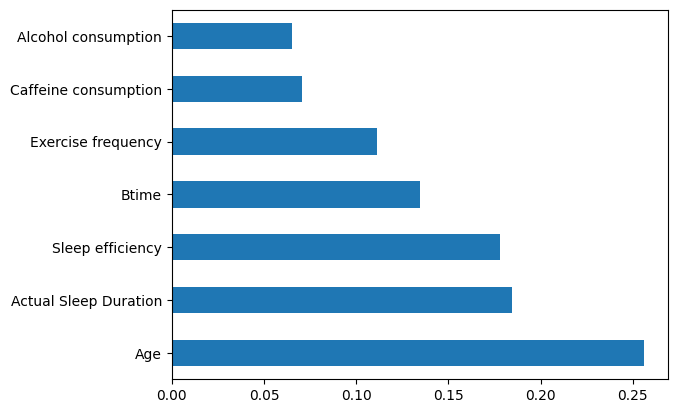

In [ ]:
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Feature Importance is an important feature of random forest regression.

It can compare the variables and evaluate the important features.

In this case, Age is shown to be the most important feature followed by Actual Sleep duation. However, unfortunately, we cannot control age. Hence we can conclude the we should increase(due to the positive corealation to REM sleep shown in ridge regression) our sleep duration to get an increase in REM Sleep.

In [ ]:
# Pull out one tree from the forest
tree = rfr.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = None, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

Visualization

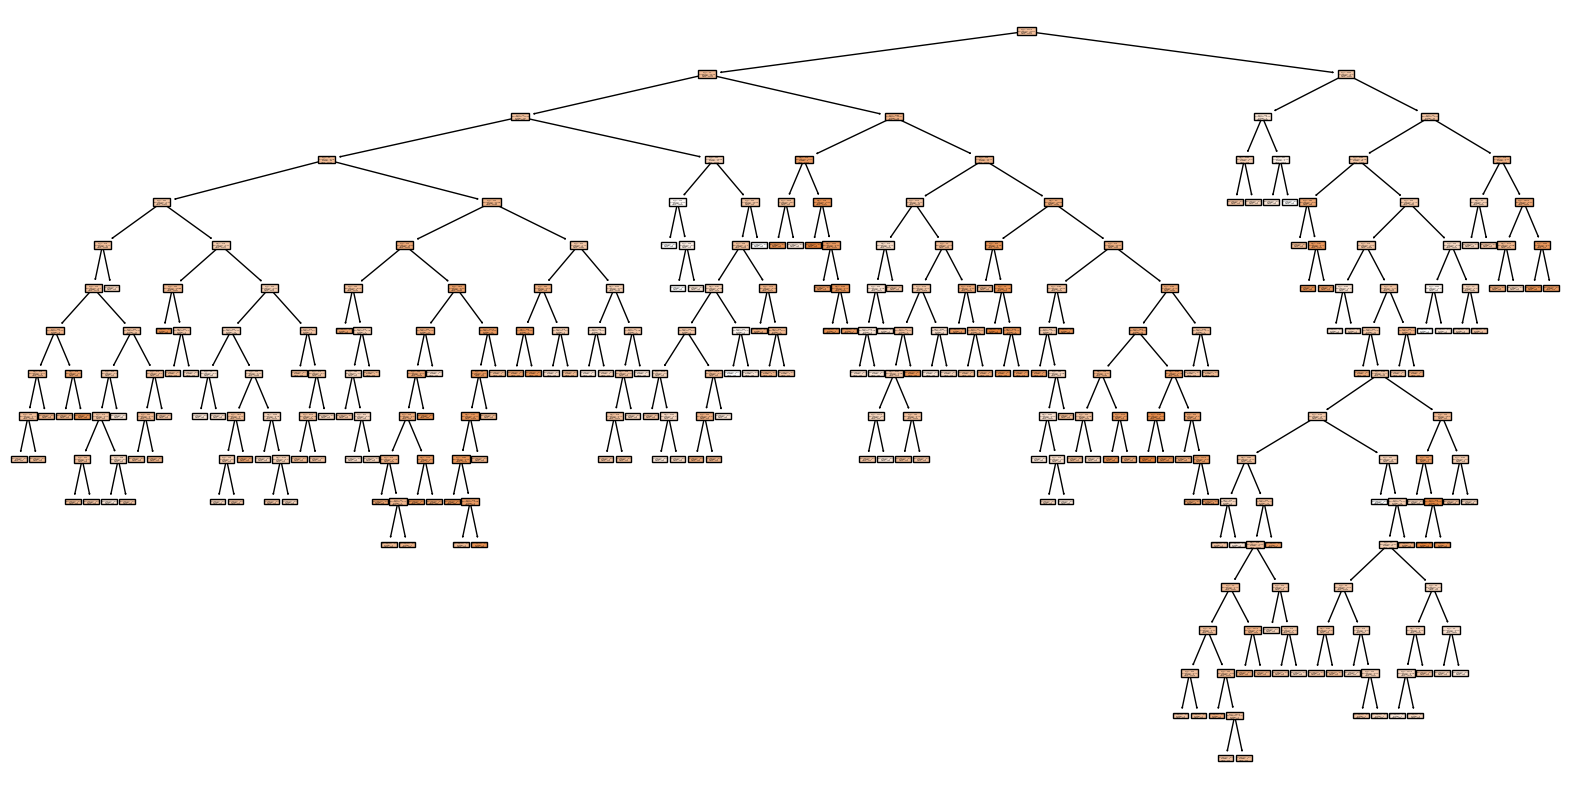

In [ ]:
from sklearn.tree import plot_tree

# Visualize individual trees
fig, ax = plt.subplots(figsize=(20,10))
plot_tree(rfr.estimators_[0], filled=True)

#fig.savefig("plot.pdf", bbox_inches="tight", dpi=300)
plt.show()



 Tree Visualisation


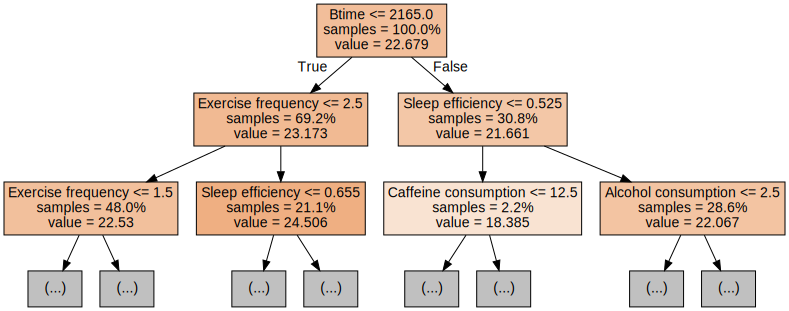

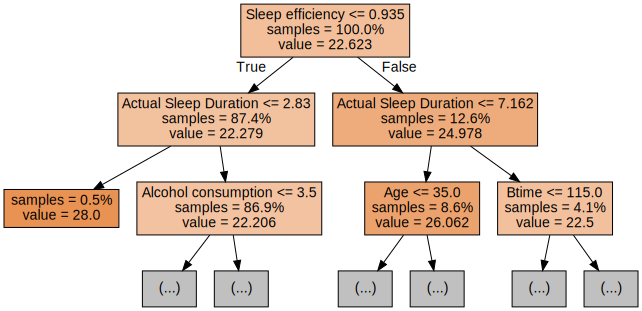

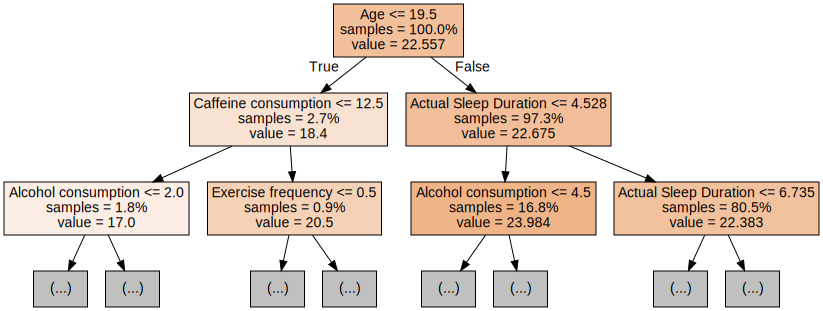

In [ ]:

for i in range(3):
    tree = rfr.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Each of the tree image only shows the first few nodes of depth 3. The colours represent the range of REM sleep percentage where blue is closer to 0 percent and red is closer to 25-30 percent. When the colurs get darker, it gets closer to 0 or 30 percent.

Each node contains the folowing information:

1: Variable used to split

2: % Sample size

3: % Rem sleep

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe0ca4d7ca0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe0c6c74250>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'n_estimators': 179}


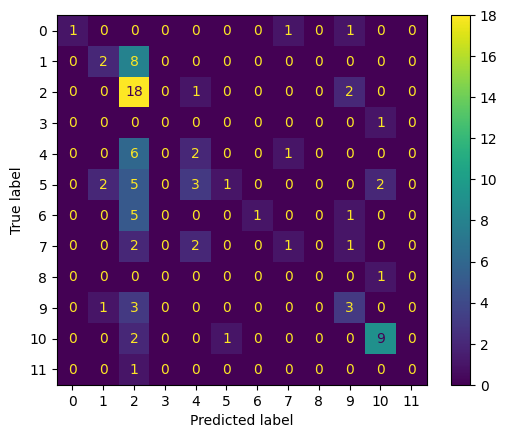

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)

Accuracy: 0.4175824175824176


Accuracy is 41 percent which shows that this model does not have the best accuracy. This may be due to the large amount of variables and variance in out data set.

# Conclusion

All in all, our analysis of Sleep Efficiency Dataset is not suggesting that it is okay to lose out on sleep. Instead, we are suggesting that given the limited number of hours an individual has in a day, and also the circumstances of a university student, which variables should an individual focus on in order to maximise quality of sleep. 
<br><br>
From our mini project, we have learnt 2 new ways to analyse data - random forest and ridge regression. The main use of ridge regression is to observe linear correlation between the variables and REM sleep percentage. Random forest was used to determine which of the varaibles were the most important in maximising REM sleep percentage. We believe that with these new found skills, we will be able to better value add in out future data science projects. 
<br><br>
Our analysis suggests that caffeine consumption has the highest correlation to REM sleep percentage, followed by sleep duration, exercise frequency and finally alcohol consumption. Yet at the same time, sleep duration is the most pertinent in getting quality sleep, followed by exercise frequency, caffeine consumption and finally alcohol consumption. 
<br><br>
The resultant analysis of our dataset is congruent to our preconceived notions around sleep and the factors affecting sleep. According to our random forest tree analysis, age has the highest importance when it comes to REM sleep percentage. However, it is an uncontrollable variable and therefore there is nothing we can do to alter this particular variable. However, there is a single variable which stands out unexpectedly - caffeine consumption. Our analysis suggests that caffeine consumption actually has a strong relation to higher percentage of REM sleep, albeit it is non-causal. Yet, numerous studies suggest otherwise. 
<br><br>
There are perhaps a few factors which could have caused our data to vary from these studies. One of which could be that the individuals surveyed have been drinking coffee for many years and as a result, have built an extremely strong tolerance towards caffeine to the point where it has minimal or negligible effects on the individual’s quality of sleep.
<br><br>
In conclusion, in order to get better quality sleep. We suggest that an individual focus on their sleep duration - aiming for an average of 7 to 9 hours of sleep a day. We should also aim to do more daily exercises. Slight consumption of caffeine does seem to improve quality of sleep. However, alcohol consumption has been linked to poor quality of sleep and should be avoided if possible. 


